In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import pandas as pd
from src.visualization.plots import plot_score_differences
from src.data.tidy_data import prepare_data, create_pivot_table
from src.results.statistical_analysis import calculate_grouped_statistics, evaluate_differences, generate_difference_report, perform_post_hoc_analysis, identify_significant_differences
import warnings
warnings.filterwarnings('ignore')

In [52]:
df_score_differences = pd.read_parquet('data/results/score_differences_all_data.parquet')
df_performance_results = pd.read_parquet('data/results/performance_detailed_data.parquet')
df_description = pd.read_parquet('data/results/df_description_data.parquet')

In [53]:
df_score_differences

,dataset,metric_x,method,cv_score,k,metric_y,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class
0,breastcancer,accuracy_score,SVC,0.978932,1,kdn,0.075472,0.075472,0.054404,0.054404
1,breastcancer,accuracy_score,SVC,0.978932,1,ddn,0.075472,0.075472,0.054404,0.054404
2,breastcancer,accuracy_score,SVC,0.978932,2,kdn,0.080189,0.080189,0.059121,0.059121
3,breastcancer,accuracy_score,SVC,0.978932,2,ddn,0.094481,0.094481,0.073413,0.073413
4,breastcancer,accuracy_score,SVC,0.978932,3,kdn,0.078616,0.078616,0.057548,0.057548
...,...,...,...,...,...,...,...,...,...,...
27475,w2a,scaled_mcc_score,best_method,0.734749,9,ddn,0.468131,0.468131,0.202880,0.202880
27476,w2a,scaled_mcc_score,best_method,0.734749,10,kdn,0.741121,0.741121,0.475871,0.475871
27477,w2a,scaled_mcc_score,best_method,0.734749,10,ddn,0.468318,0.468318,0.203067,0.203067
27478,w2a,scaled_mcc_score,best_method,0.734749,11,kdn,0.762107,0.762107,0.496856,0.496856


In [54]:
df_merged = prepare_data(df_description, df_score_differences, df_performance_results, 1)

In [55]:
df_merged

,dataset,metric_x,method,cv_score,k,metric_y,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class,class_prop_category,minority_class_complexity_category,most_complex_class_category
0,breastcancer,accuracy_score,SVC,0.978932,1,kdn,0.075472,0.075472,0.054404,0.054404,0.3-0.4,0-0.1,0-0.1
1,breastcancer,accuracy_score,SVC,0.978932,1,ddn,0.075472,0.075472,0.054404,0.054404,0.3-0.4,0-0.1,0-0.1
2,breastcancer,accuracy_score,KNeighborsClassifier,0.968390,1,kdn,0.075472,0.075472,0.043862,0.043862,0.3-0.4,0-0.1,0-0.1
3,breastcancer,accuracy_score,KNeighborsClassifier,0.968390,1,ddn,0.075472,0.075472,0.043862,0.043862,0.3-0.4,0-0.1,0-0.1
4,breastcancer,accuracy_score,RandomForestClassifier,0.966620,1,kdn,0.075472,0.075472,0.042092,0.042092,0.3-0.4,0-0.1,0-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,w2a,scaled_mcc_score,RandomForestClassifier,0.644977,1,ddn,0.408131,0.408131,0.053108,0.053108,0-0.1,0.4-0.5,0.4-0.5
2596,w2a,scaled_mcc_score,GradientBoostingClassifier,0.672901,1,kdn,0.345794,0.345794,0.018695,0.018695,0-0.1,0.3-0.4,0.3-0.4
2597,w2a,scaled_mcc_score,GradientBoostingClassifier,0.672901,1,ddn,0.408131,0.408131,0.081032,0.081032,0-0.1,0.4-0.5,0.4-0.5
2598,w2a,scaled_mcc_score,best_method,0.734749,1,kdn,0.345794,0.345794,0.080544,0.080544,0-0.1,0.3-0.4,0.3-0.4


# Difference between score and complexity (1 - complexity)

## By ML model

In [21]:
calculate_grouped_statistics(df_merged, diff='diff_score_most_complex_class', x_var='method')

,method,metric_y,median,mean,std,min,max,count
0,GradientBoostingClassifier,ddn,0.089107,0.107037,0.174204,-0.440467,0.672222,260
1,GradientBoostingClassifier,kdn,0.085693,0.097350,0.183100,-0.490337,0.672222,260
2,KNeighborsClassifier,ddn,0.062713,0.061275,0.200883,-0.614697,0.672222,260
3,KNeighborsClassifier,kdn,0.053915,0.051588,0.210466,-0.656405,0.672222,260
4,RandomForestClassifier,ddn,0.079018,0.091329,0.179173,-0.446544,0.677778,260
5,RandomForestClassifier,kdn,0.069351,0.081642,0.187798,-0.508642,0.677778,260
6,SVC,ddn,0.090718,0.107662,0.166666,-0.389027,0.661111,260
7,SVC,kdn,0.085834,0.097975,0.173787,-0.431075,0.661111,260
8,best_method,ddn,0.101993,0.127584,0.162186,-0.388638,0.677778,260
9,best_method,kdn,0.095373,0.117897,0.169968,-0.430686,0.677778,260


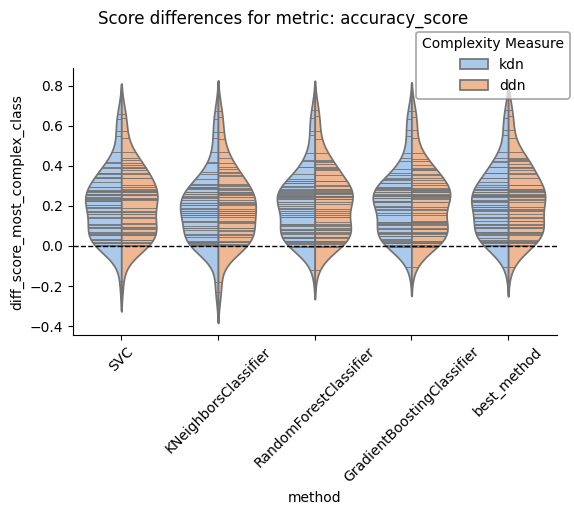

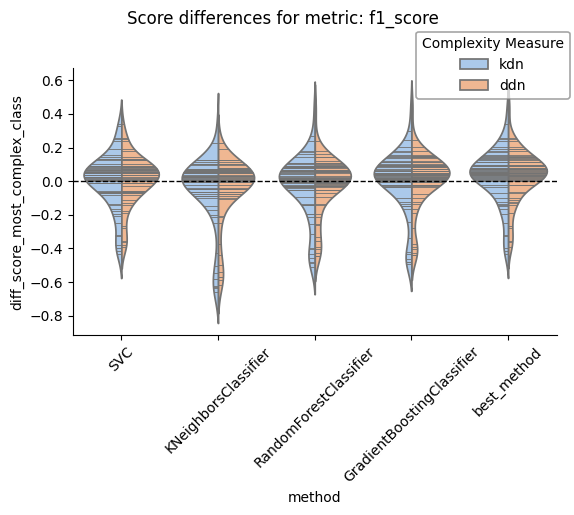

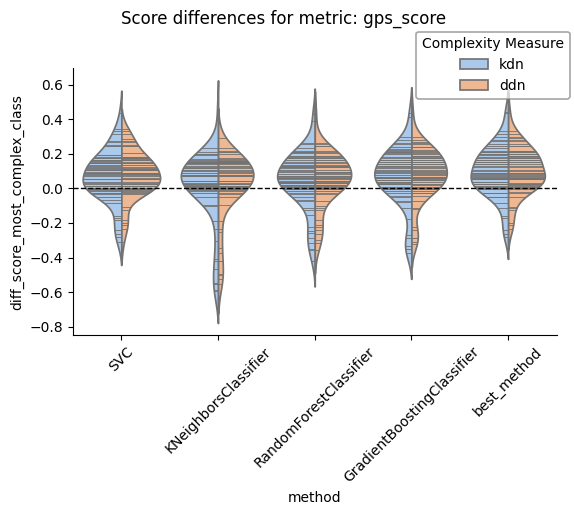

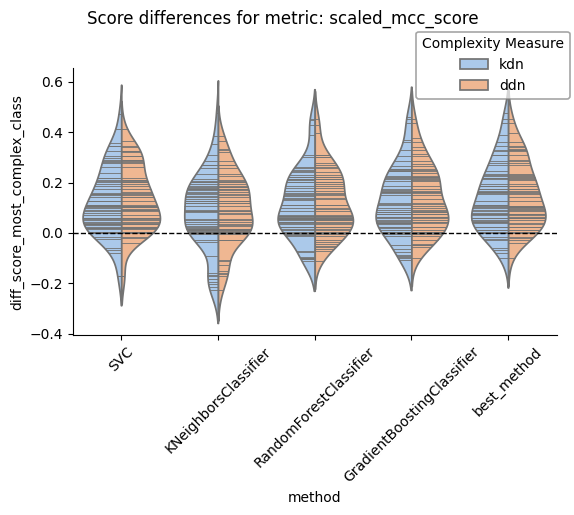

In [22]:
plot_score_differences(df_merged, diff='diff_score_most_complex_class', x_var='method')

In [23]:
calculate_grouped_statistics(df_merged, diff='diff_score_minority_class_complexity', x_var='method')

,method,metric_y,median,mean,std,min,max,count
0,GradientBoostingClassifier,ddn,0.089107,0.101657,0.169279,-0.440467,0.672222,260
1,GradientBoostingClassifier,kdn,0.085693,0.091939,0.178098,-0.490337,0.672222,260
2,KNeighborsClassifier,ddn,0.056391,0.055896,0.202100,-0.614697,0.672222,260
3,KNeighborsClassifier,kdn,0.047121,0.046178,0.211386,-0.656405,0.672222,260
4,RandomForestClassifier,ddn,0.079018,0.085950,0.174175,-0.446544,0.677778,260
5,RandomForestClassifier,kdn,0.069351,0.076232,0.182720,-0.508642,0.677778,260
6,SVC,ddn,0.085834,0.102283,0.164661,-0.389027,0.661111,260
7,SVC,kdn,0.074153,0.092565,0.171548,-0.431075,0.661111,260
8,best_method,ddn,0.094559,0.122205,0.157589,-0.388638,0.677778,260
9,best_method,kdn,0.091949,0.112487,0.165244,-0.430686,0.677778,260


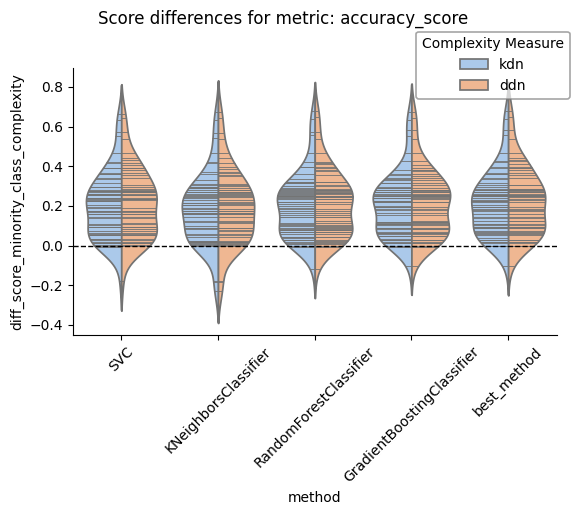

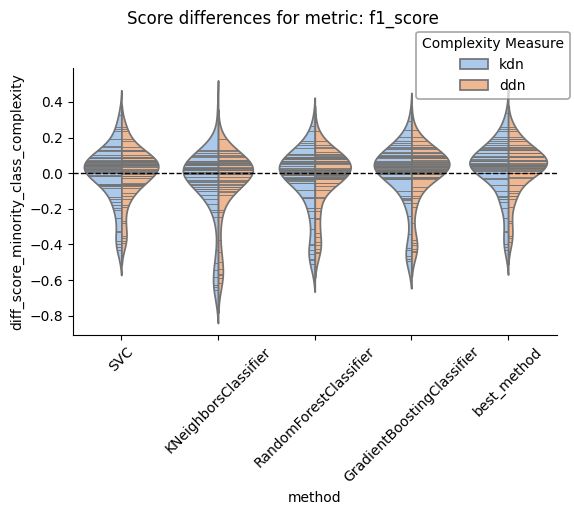

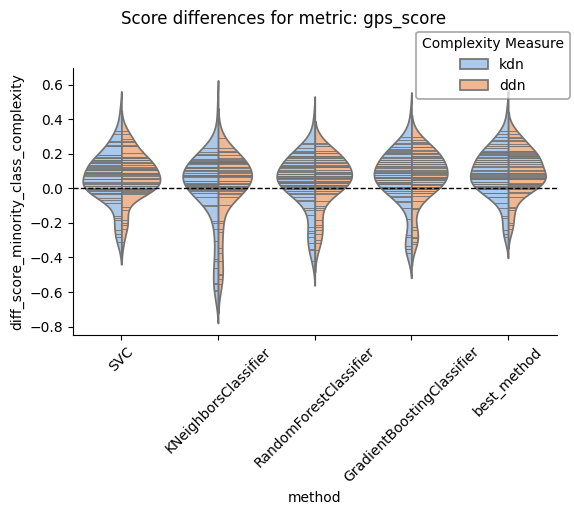

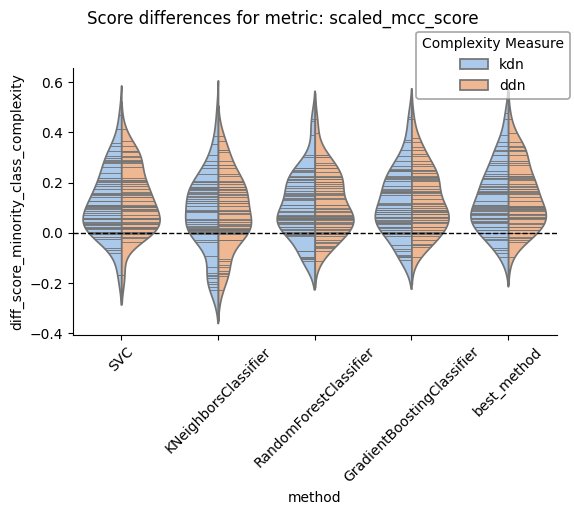

In [24]:
plot_score_differences(df_merged, diff='diff_score_minority_class_complexity', x_var='method')

## By Imbalance level

In [25]:
calculate_grouped_statistics(df_merged, diff='diff_score_most_complex_class', x_var='class_prop_category')

,class_prop_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.046667,0.043493,0.240022,-0.614697,0.647494,400
1,0-0.1,kdn,0.040851,0.023593,0.250724,-0.656405,0.637690,400
2,0.1-0.2,ddn,0.117606,0.148070,0.158807,-0.075368,0.677778,200
3,0.1-0.2,kdn,0.105647,0.129175,0.156485,-0.204643,0.677778,200
4,0.2-0.3,ddn,0.178829,0.177922,0.128728,-0.103968,0.441694,260
5,0.2-0.3,kdn,0.165503,0.178460,0.146677,-0.173013,0.555562,260
6,0.3-0.4,ddn,0.058991,0.096023,0.093173,-0.078535,0.279763,200
7,0.3-0.4,kdn,0.058533,0.096023,0.093166,-0.078535,0.279763,200
8,0.4-0.5,ddn,0.070578,0.067481,0.123903,-0.245846,0.437155,240
9,0.4-0.5,kdn,0.060196,0.063339,0.124284,-0.245846,0.438123,240


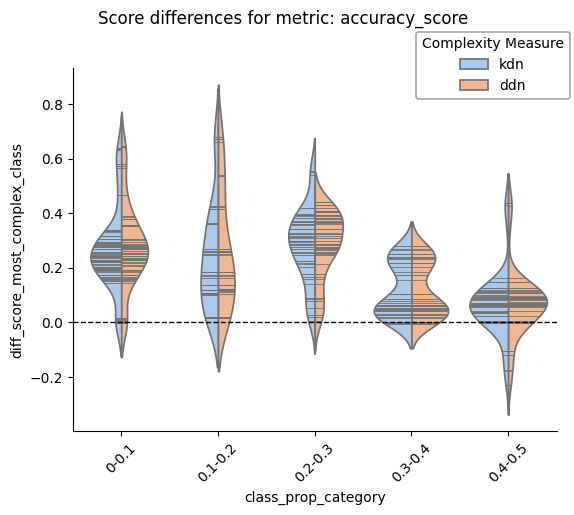

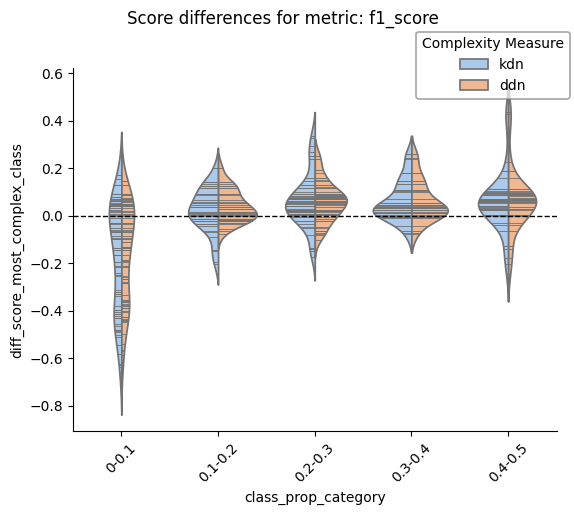

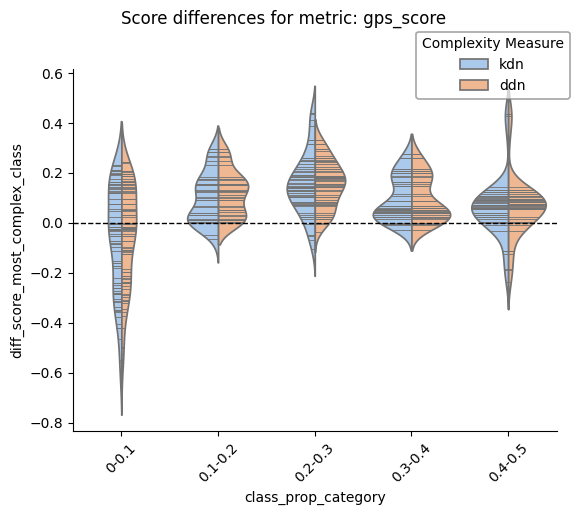

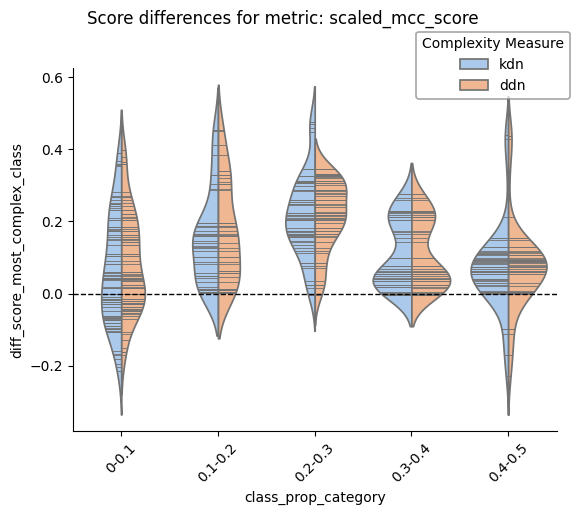

In [27]:
plot_score_differences(df_merged, diff='diff_score_most_complex_class', x_var='class_prop_category')

In [28]:
calculate_grouped_statistics(df_merged, diff='diff_score_minority_class_complexity', x_var='class_prop_category')

,class_prop_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.046667,0.043493,0.240022,-0.614697,0.647494,400
1,0-0.1,kdn,0.040851,0.023593,0.250724,-0.656405,0.637690,400
2,0.1-0.2,ddn,0.117606,0.148070,0.158807,-0.075368,0.677778,200
3,0.1-0.2,kdn,0.105647,0.129175,0.156485,-0.204643,0.677778,200
4,0.2-0.3,ddn,0.178829,0.177922,0.128728,-0.103968,0.441694,260
5,0.2-0.3,kdn,0.165503,0.178460,0.146677,-0.173013,0.555562,260
6,0.3-0.4,ddn,0.058991,0.096023,0.093173,-0.078535,0.279763,200
7,0.3-0.4,kdn,0.058533,0.096023,0.093166,-0.078535,0.279763,200
8,0.4-0.5,ddn,0.066733,0.038342,0.085352,-0.245846,0.190319,240
9,0.4-0.5,kdn,0.058771,0.034033,0.084177,-0.245846,0.190319,240


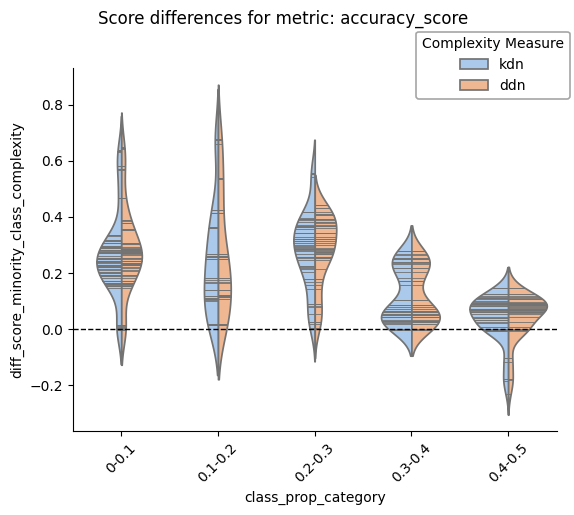

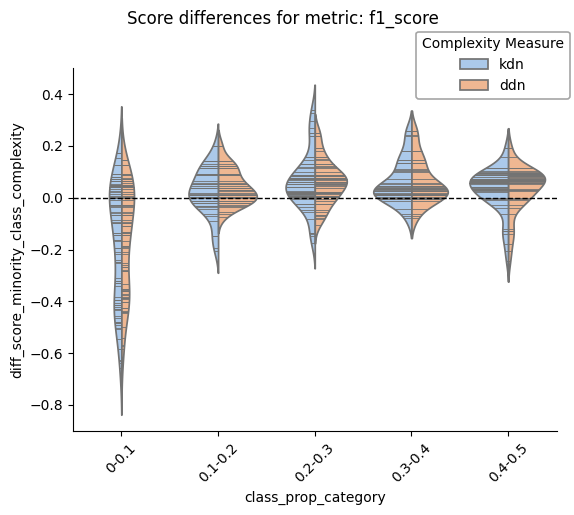

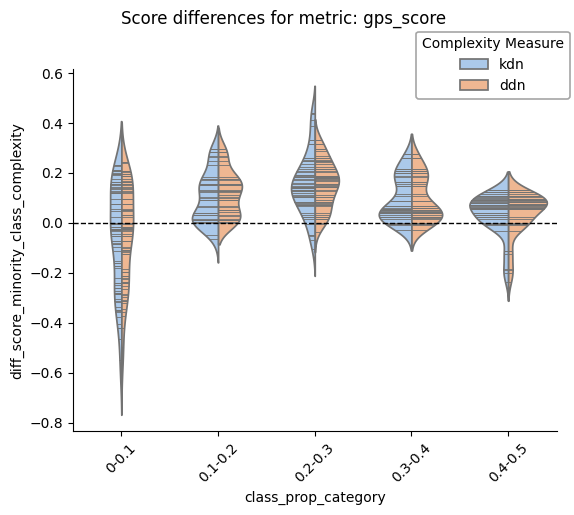

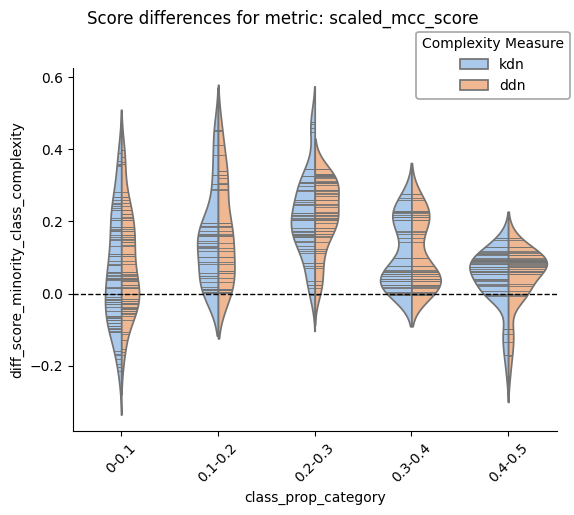

In [29]:
plot_score_differences(df_merged, diff='diff_score_minority_class_complexity', x_var='class_prop_category')

## ML model x imbalanced level

In [30]:
create_pivot_table(df_merged, diff='diff_score_most_complex_class', x_var='method', metric_y='metric_y', stat='mean')

method,class_prop_category,metric_y,GradientBoostingClassifier,KNeighborsClassifier,RandomForestClassifier,SVC,best_method
0,0-0.1,ddn,0.047454,-0.002530,0.020313,0.065821,0.086405
1,0-0.1,kdn,0.027554,-0.022429,0.000414,0.045922,0.066505
2,0.1-0.2,ddn,0.157074,0.132906,0.140922,0.145443,0.164005
3,0.1-0.2,kdn,0.138179,0.114011,0.122027,0.126548,0.145110
4,0.2-0.3,ddn,0.180213,0.144857,0.164849,0.193974,0.205716
5,0.2-0.3,kdn,0.180751,0.145395,0.165387,0.194512,0.206253
6,0.3-0.4,ddn,0.112097,0.059238,0.101052,0.090881,0.116848
7,0.3-0.4,kdn,0.112097,0.059238,0.101052,0.090882,0.116848
8,0.4-0.5,ddn,0.081152,0.019075,0.080614,0.066392,0.090171
9,0.4-0.5,kdn,0.077010,0.014933,0.076472,0.062250,0.086028


In [31]:
create_pivot_table(df_merged, diff='diff_score_minority_class_complexity', x_var='method', stat='mean')

method,class_prop_category,metric_y,GradientBoostingClassifier,KNeighborsClassifier,RandomForestClassifier,SVC,best_method
0,0-0.1,ddn,0.047454,-0.002530,0.020313,0.065821,0.086405
1,0-0.1,kdn,0.027554,-0.022429,0.000414,0.045922,0.066505
2,0.1-0.2,ddn,0.157074,0.132906,0.140922,0.145443,0.164005
3,0.1-0.2,kdn,0.138179,0.114011,0.122027,0.126548,0.145110
4,0.2-0.3,ddn,0.180213,0.144857,0.164849,0.193974,0.205716
5,0.2-0.3,kdn,0.180751,0.145395,0.165387,0.194512,0.206253
6,0.3-0.4,ddn,0.112097,0.059238,0.101052,0.090881,0.116848
7,0.3-0.4,kdn,0.112097,0.059238,0.101052,0.090882,0.116848
8,0.4-0.5,ddn,0.052014,-0.010063,0.051476,0.037253,0.061032
9,0.4-0.5,kdn,0.047705,-0.014373,0.047167,0.032944,0.056723


In [32]:
anova_results = evaluate_differences(df_merged, variable='diff_score_minority_class_complexity', factor1='class_prop_category', factor2='method')

In [33]:
report = generate_difference_report(anova_results)

print(report)

Based on the ANOVA tests, statistically significant differences in 'diff_score_minority_class_complexity' were observed according to 'class_prop_category' and 'best_method' across various combinations of 'metric_x' and 'metric_y'. The following combinations showed significant differences:

- For accuracy_score and ddn, the test used was ANOVA with a p-value of 0.000000 and a test statistic of 6.3124.
- For accuracy_score and kdn, the test used was ANOVA with a p-value of 0.000000 and a test statistic of 5.9733.
- For f1_score and ddn, the test used was ANOVA with a p-value of 0.000000 and a test statistic of 7.5380.
- For f1_score and kdn, the test used was ANOVA with a p-value of 0.000000 and a test statistic of 6.6979.
- For gps_score and ddn, the test used was ANOVA with a p-value of 0.000000 and a test statistic of 5.5133.
- For gps_score and kdn, the test used was ANOVA with a p-value of 0.000000 and a test statistic of 5.0568.
- For scaled_mcc_score and ddn, the test used was ANO

In [35]:
# Usar la función para realizar el análisis post-hoc
post_hoc_results = perform_post_hoc_analysis(df_merged, variable='diff_score_minority_class_complexity', factor1='class_prop_category', factor2='method')

# Mostrar los resultados del análisis post-hoc
if post_hoc_results:
    for key, result in post_hoc_results.items():
        print(f"Post-hoc analysis for {key}:\n", result)
else:
    print("No post-hoc results available.")

Post-hoc analysis for ('accuracy_score', 'ddn'):
                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------
  0-0.1_GradientBoostingClassifier         0-0.1_KNeighborsClassifier   -0.005    1.0 -0.1756  0.1656  False
  0-0.1_GradientBoostingClassifier       0-0.1_RandomForestClassifier  -0.0033    1.0 -0.1739  0.1673  False
  0-0.1_GradientBoostingClassifier                          0-0.1_SVC   0.0005    1.0 -0.1701  0.1711  False
  0-0.1_GradientBoostingClassifier                  0-0.1_best_method   0.0035    1.0 -0.1671  0.1741  False
  0-0.1_GradientBoostingClassifier 0.1-0.2_GradientBoostingClassifier  -0.0253    1.0 -0.2342  0.1837  False
  0-0.1_GradientBoostingClassifier       0.1-0.2_KNeighborsClassifier  -0.0276

In [36]:
# Identify significant differences
significant_differences = identify_significant_differences(post_hoc_results)

# Show the significant differences
if significant_differences:
    for key, diffs in significant_differences.items():
        print(f"Significant differences for {key}:")
        for diff in diffs:
            print(diff)
else:
    print("No significant differences found.")

Significant differences for ('accuracy_score', 'ddn'):
{'group1': '0-0.1_GradientBoostingClassifier', 'group2': '0.4-0.5_GradientBoostingClassifier', 'meandiff': -0.2299, 'p-adj': 0.0054, 'lower': -0.4269, 'upper': -0.0329}
{'group1': '0-0.1_GradientBoostingClassifier', 'group2': '0.4-0.5_KNeighborsClassifier', 'meandiff': -0.2941, 'p-adj': 0.0, 'lower': -0.4911, 'upper': -0.0971}
{'group1': '0-0.1_GradientBoostingClassifier', 'group2': '0.4-0.5_RandomForestClassifier', 'meandiff': -0.2303, 'p-adj': 0.0052, 'lower': -0.4273, 'upper': -0.0333}
{'group1': '0-0.1_GradientBoostingClassifier', 'group2': '0.4-0.5_SVC', 'meandiff': -0.2461, 'p-adj': 0.0015, 'lower': -0.4431, 'upper': -0.0491}
{'group1': '0-0.1_GradientBoostingClassifier', 'group2': '0.4-0.5_best_method', 'meandiff': -0.2228, 'p-adj': 0.0091, 'lower': -0.4198, 'upper': -0.0258}
{'group1': '0-0.1_KNeighborsClassifier', 'group2': '0.4-0.5_GradientBoostingClassifier', 'meandiff': -0.2248, 'p-adj': 0.0078, 'lower': -0.4218, 'upper

## By complexity

In [58]:
calculate_grouped_statistics(df_merged, diff='diff_score_most_complex_class', x_var='most_complex_class_category')

,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.002862,0.000657,0.054169,-0.381908,0.060149,220
1,0-0.1,kdn,0.002862,0.000729,0.054189,-0.381908,0.060476,220
2,0.1-0.2,ddn,0.055014,0.028026,0.084558,-0.245846,0.173178,160
3,0.1-0.2,kdn,0.049110,0.026301,0.084388,-0.245846,0.173178,160
4,0.2-0.3,ddn,0.091691,0.055008,0.160402,-0.585378,0.282651,300
5,0.2-0.3,kdn,0.070680,0.007999,0.200915,-0.656405,0.282651,320
6,0.3-0.4,ddn,0.152874,0.074565,0.221908,-0.614697,0.357719,180
7,0.3-0.4,kdn,0.157458,0.103611,0.187429,-0.629100,0.337296,220
8,0.4-0.5,ddn,0.214279,0.213904,0.175684,-0.439516,0.677778,440
9,0.4-0.5,kdn,0.222487,0.227250,0.171371,-0.252941,0.677778,380


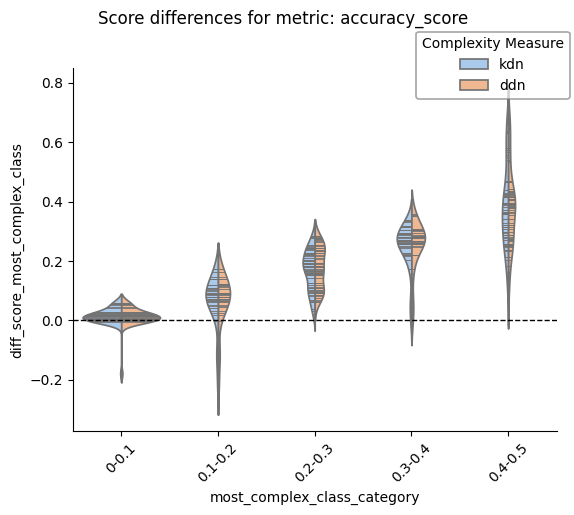

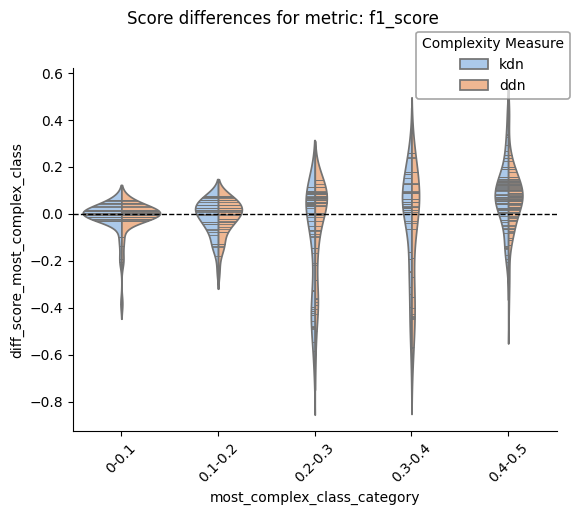

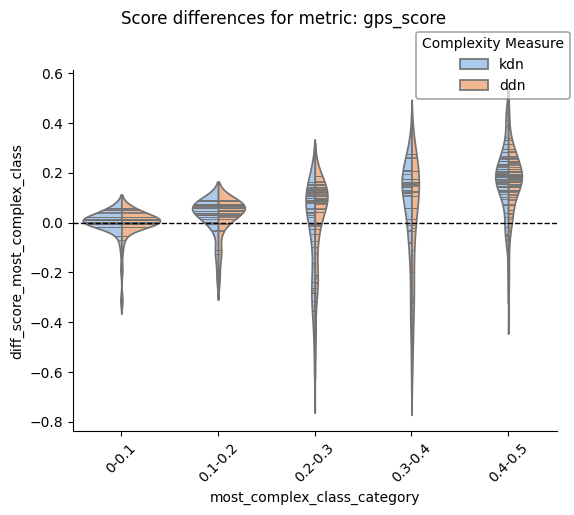

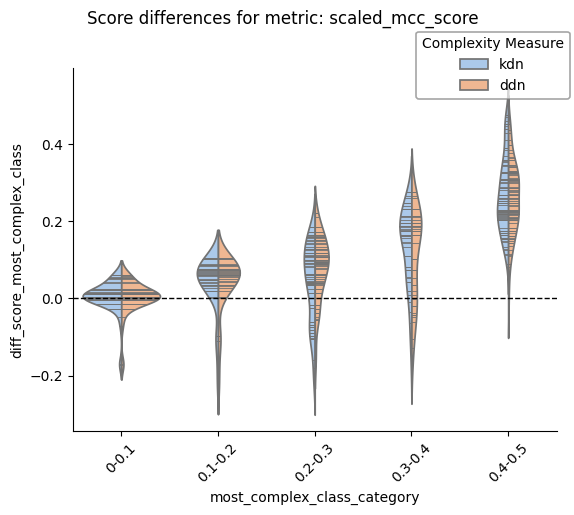

In [59]:
plot_score_differences(df_merged, diff='diff_score_most_complex_class', x_var='most_complex_class_category')

In [60]:
calculate_grouped_statistics(df_merged, diff='diff_score_most_complex_class', x_var='minority_class_complexity_category')

,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.002862,0.000657,0.054169,-0.381908,0.060149,220
1,0-0.1,kdn,0.002862,0.000729,0.054189,-0.381908,0.060476,220
2,0.1-0.2,ddn,0.061514,0.065556,0.136943,-0.245846,0.437155,180
3,0.1-0.2,kdn,0.061347,0.064130,0.137511,-0.245846,0.438123,180
4,0.2-0.3,ddn,0.091691,0.055008,0.160402,-0.585378,0.282651,300
5,0.2-0.3,kdn,0.070680,0.007999,0.200915,-0.656405,0.282651,320
6,0.3-0.4,ddn,0.152874,0.074565,0.221908,-0.614697,0.357719,180
7,0.3-0.4,kdn,0.157458,0.103611,0.187429,-0.629100,0.337296,220
8,0.4-0.5,ddn,0.205220,0.206671,0.175290,-0.439516,0.677778,420
9,0.4-0.5,kdn,0.216564,0.219500,0.171247,-0.252941,0.677778,360


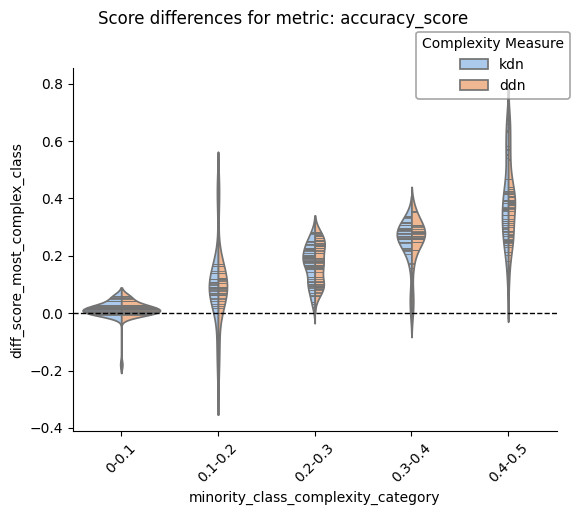

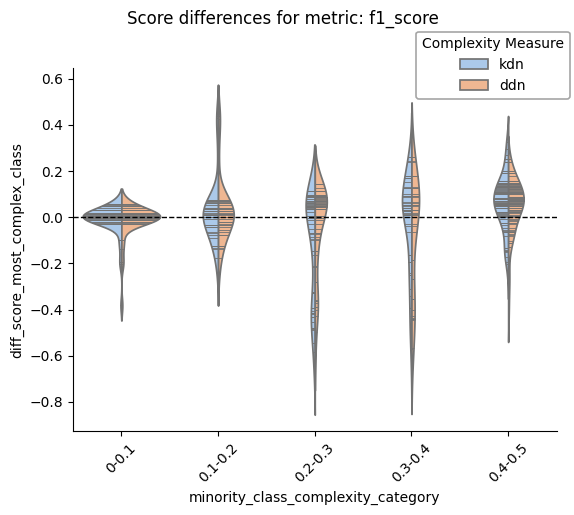

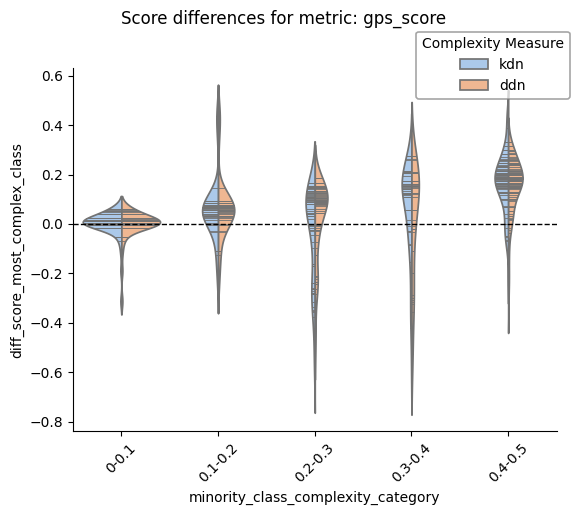

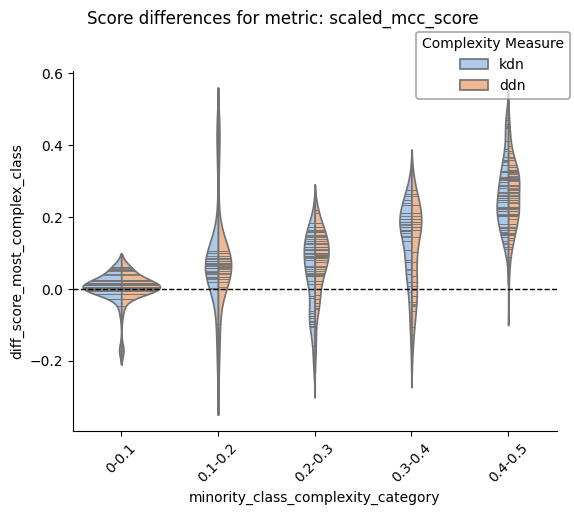

In [61]:
plot_score_differences(df_merged, diff='diff_score_most_complex_class', x_var='minority_class_complexity_category')

In [62]:
calculate_grouped_statistics(df_merged, diff='diff_score_minority_class_complexity', x_var='most_complex_class_category')

,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.000000,0.000299,0.054171,-0.381908,0.060149,220
1,0-0.1,kdn,0.000000,0.000371,0.054191,-0.381908,0.060476,220
2,0.1-0.2,ddn,0.055014,0.028026,0.084558,-0.245846,0.173178,160
3,0.1-0.2,kdn,0.049110,0.026301,0.084388,-0.245846,0.173178,160
4,0.2-0.3,ddn,0.091691,0.055008,0.160402,-0.585378,0.282651,300
5,0.2-0.3,kdn,0.070680,0.007999,0.200915,-0.656405,0.282651,320
6,0.3-0.4,ddn,0.152874,0.074565,0.221908,-0.614697,0.357719,180
7,0.3-0.4,kdn,0.157458,0.103611,0.187429,-0.629100,0.337296,220
8,0.4-0.5,ddn,0.201453,0.198189,0.176856,-0.439516,0.677778,440
9,0.4-0.5,kdn,0.203783,0.208949,0.174049,-0.252941,0.677778,380


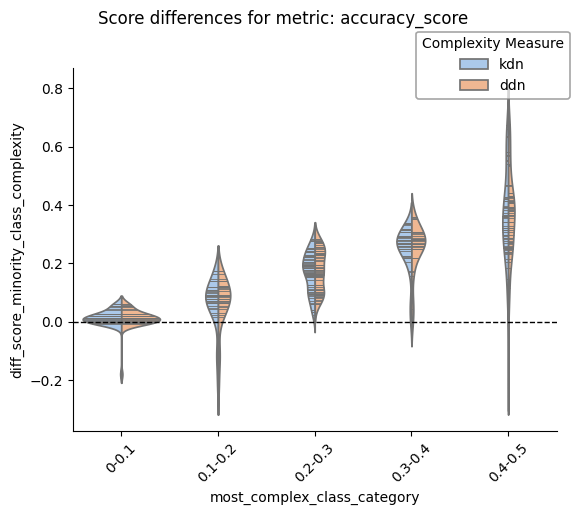

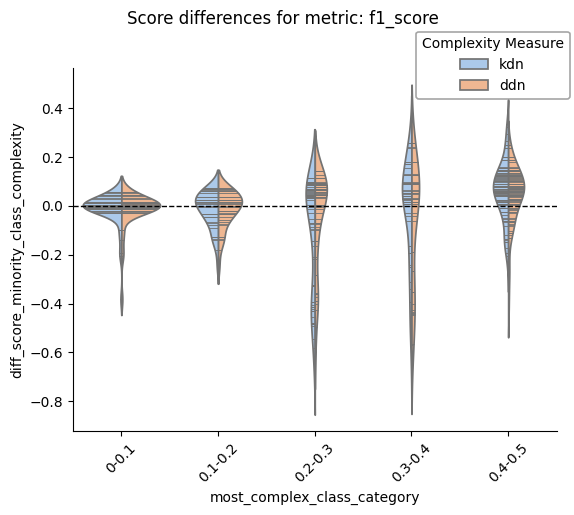

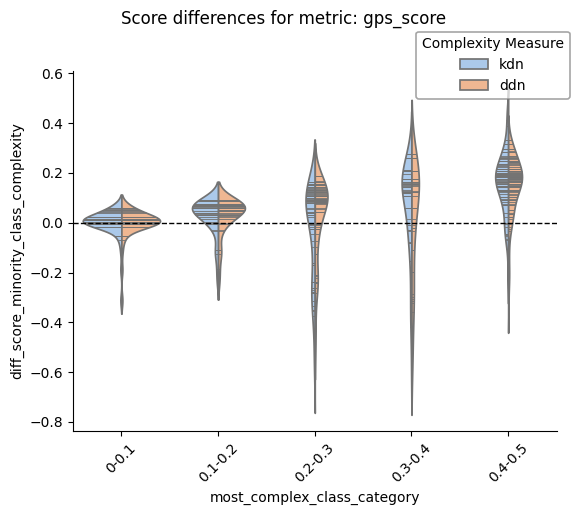

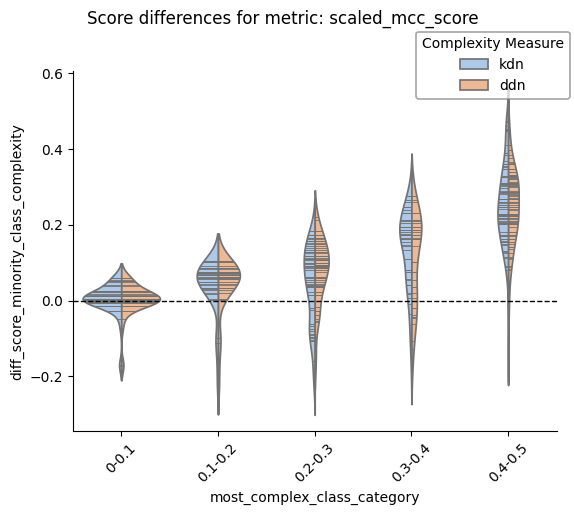

In [63]:
plot_score_differences(df_merged, diff='diff_score_minority_class_complexity', x_var='most_complex_class_category')

In [64]:
calculate_grouped_statistics(df_merged, diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category')

,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.000000,0.000299,0.054171,-0.381908,0.060149,220
1,0-0.1,kdn,0.000000,0.000371,0.054191,-0.381908,0.060476,220
2,0.1-0.2,ddn,0.057872,0.027142,0.086190,-0.245846,0.173178,180
3,0.1-0.2,kdn,0.052452,0.025493,0.086036,-0.245846,0.173178,180
4,0.2-0.3,ddn,0.091691,0.055008,0.160402,-0.585378,0.282651,300
5,0.2-0.3,kdn,0.070680,0.007999,0.200915,-0.656405,0.282651,320
6,0.3-0.4,ddn,0.152874,0.074565,0.221908,-0.614697,0.357719,180
7,0.3-0.4,kdn,0.157458,0.103611,0.187429,-0.629100,0.337296,220
8,0.4-0.5,ddn,0.205220,0.206671,0.175290,-0.439516,0.677778,420
9,0.4-0.5,kdn,0.216564,0.219500,0.171247,-0.252941,0.677778,360


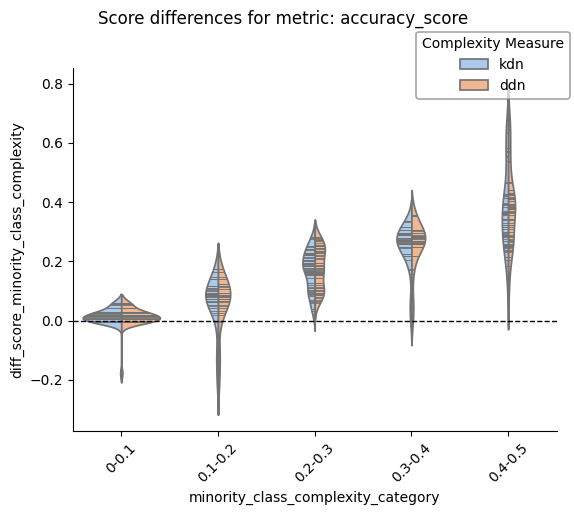

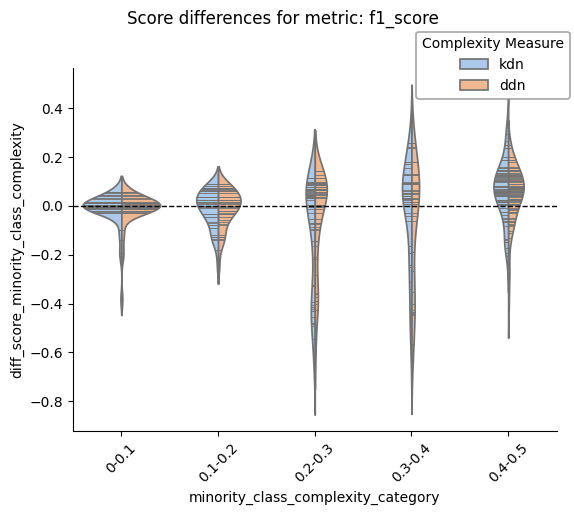

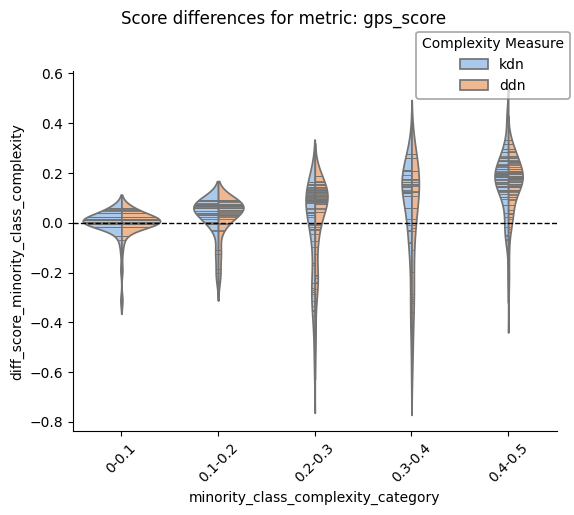

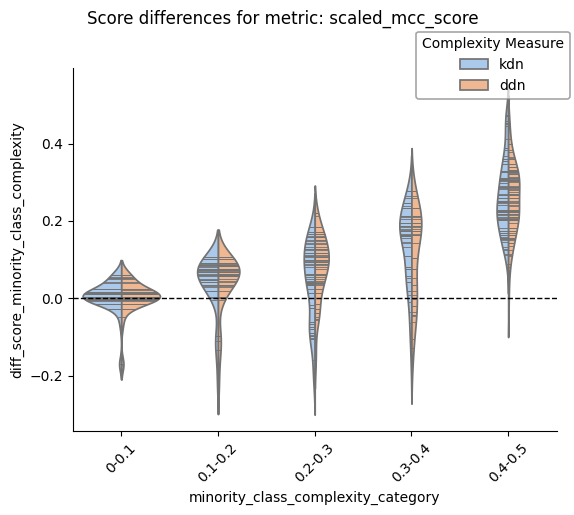

In [65]:
plot_score_differences(df_merged, diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category')